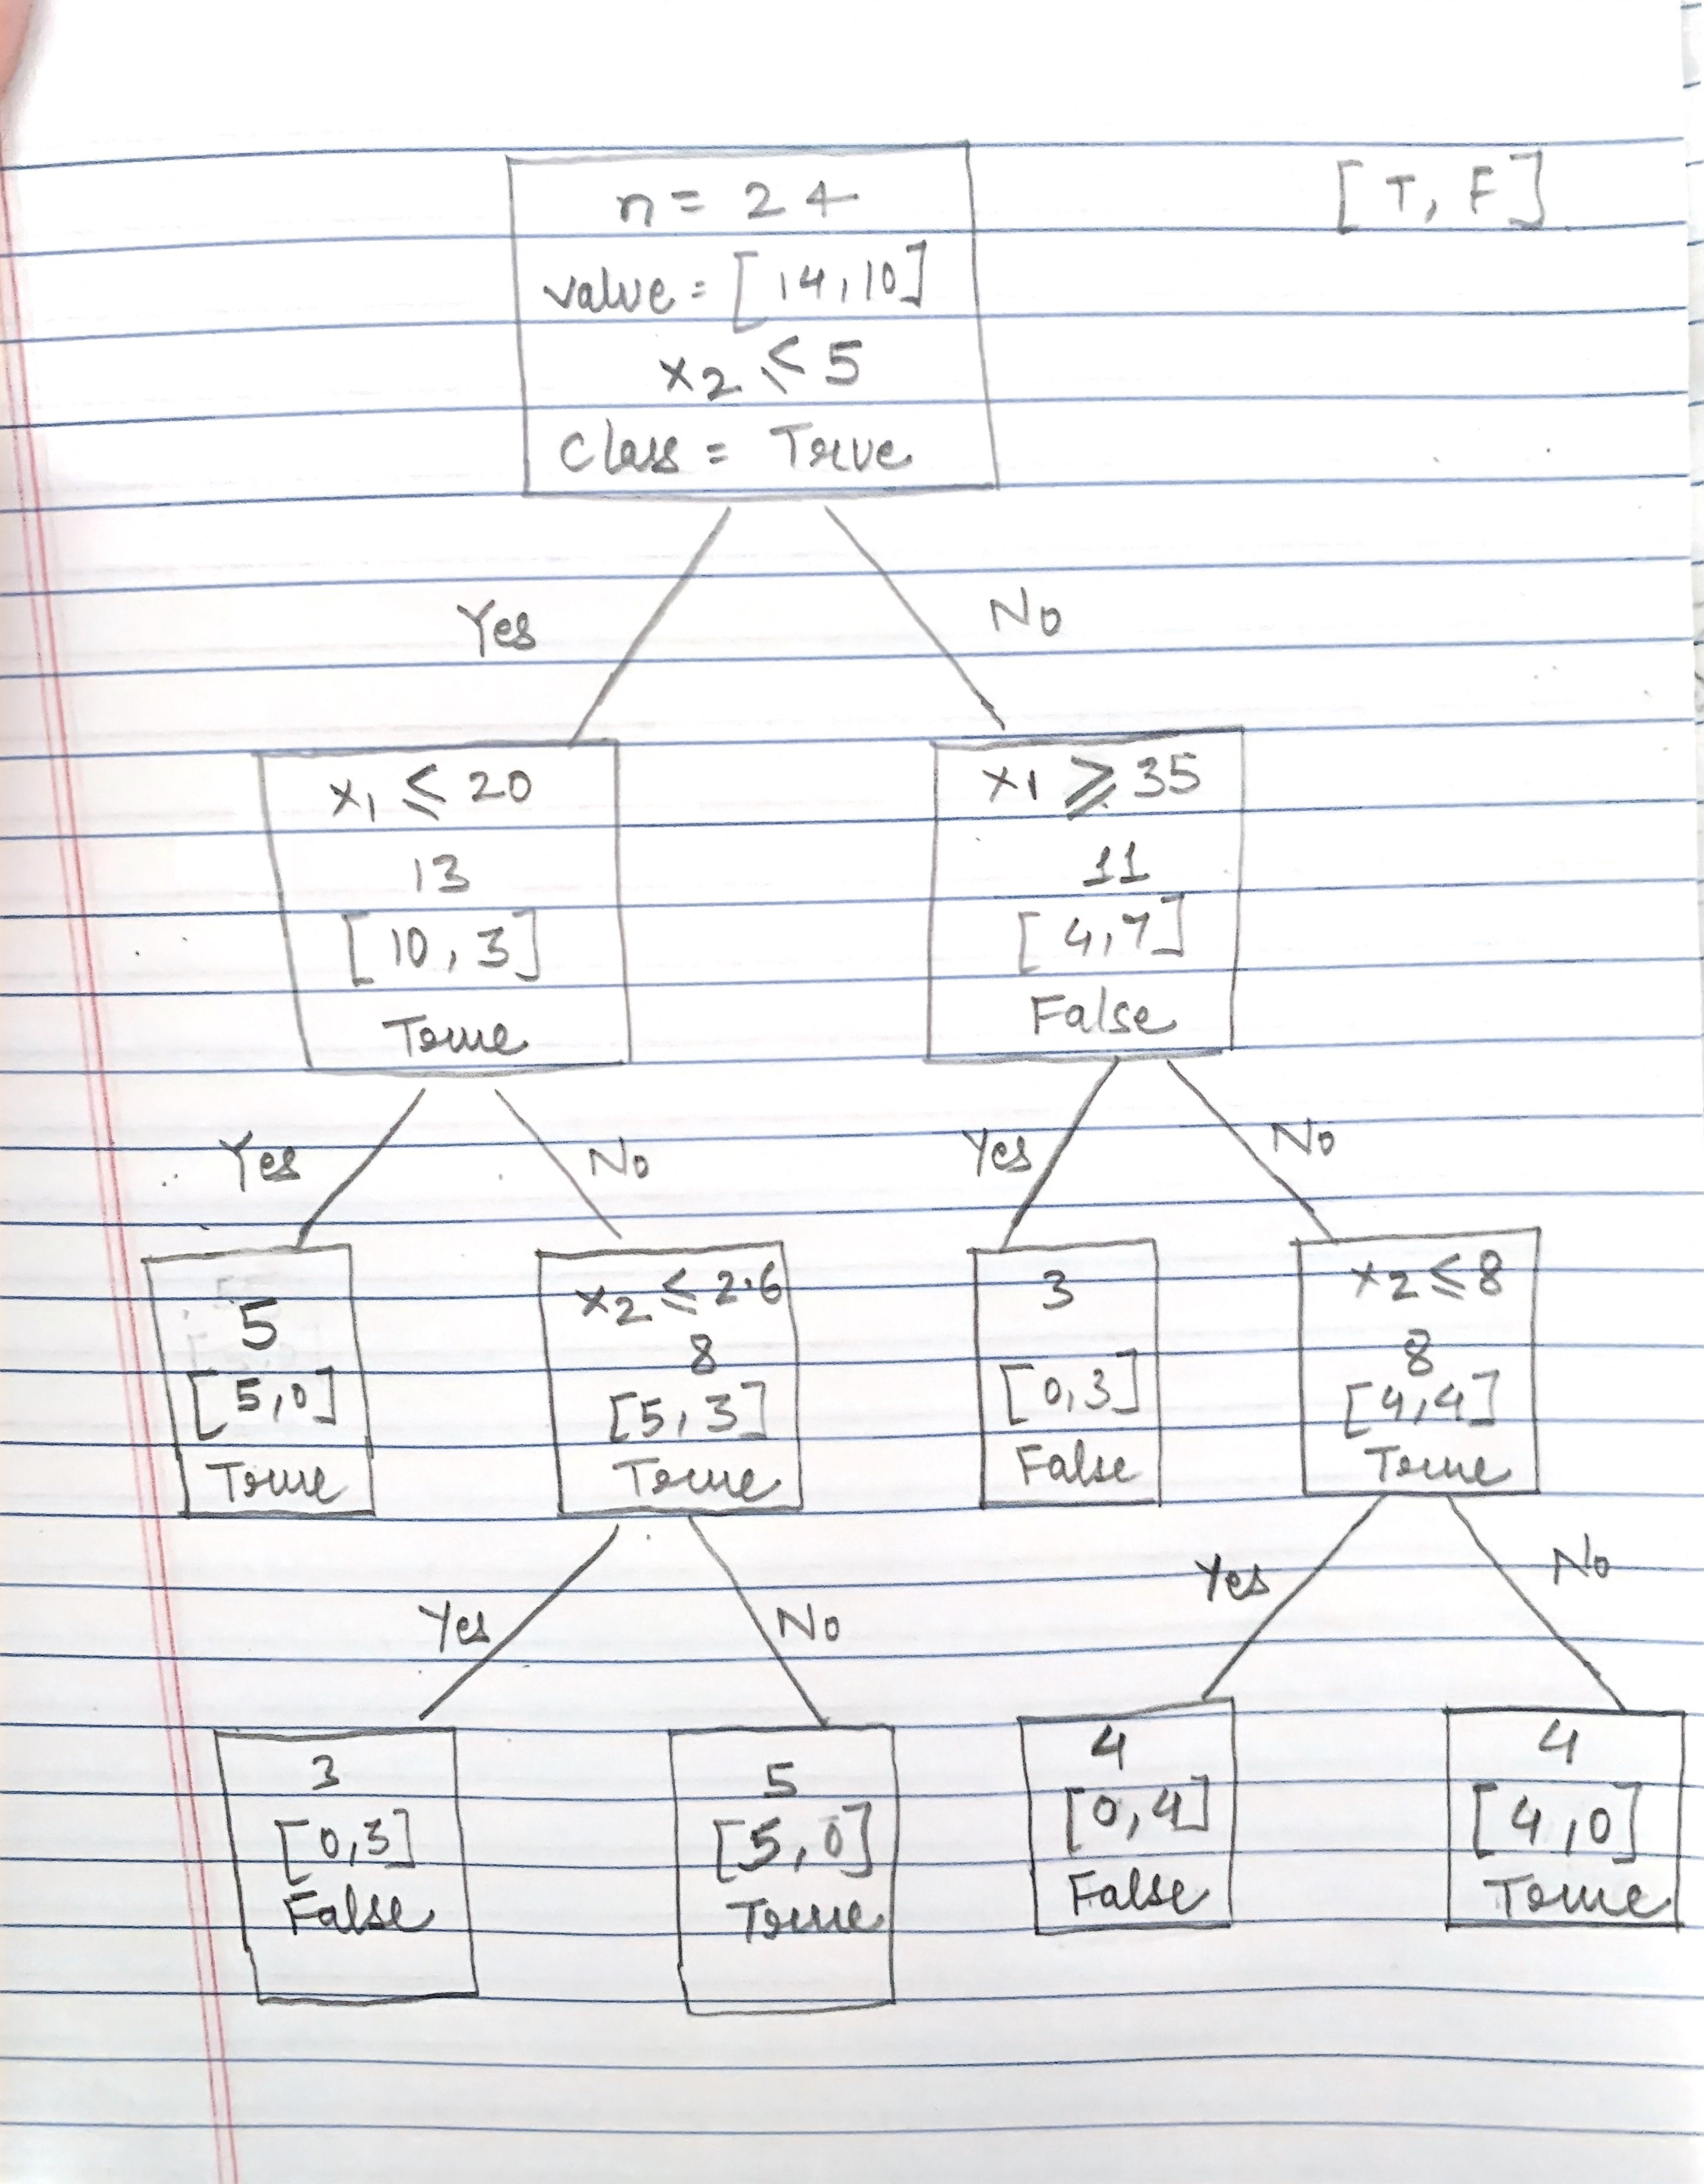

In [12]:
from IPython.display import Image
Image(filename='Answer-1.jpg',width=800, height=400)    #Answer1

Practice (80 points) – If you need to write something, please use Markdown
1.	Find “FlightDelaysR.csv” and load it using pandas.
2.	Split data into input and output (outcome) (5 points)
a.	For input features (6 features): 'DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER', ‘Weather’
b.	For outcome: ‘FlightStatus’
3.	Make dummy/indicator variables/features using pd.get_dummies. (5 points)
4.	Split data into training and test data set (use 20% for test). (5 points)
5.	Use DecisionTreeClassifier in sckitlearn and do classification (5 points)
a.	Use criterion='gini' and use default options for others. 
6.	Draw confusion matrix (5 points)
7.	Draw ROC curve and cumulative gain chart. (5 points)
8.	Change parameter values ((1) criterion, (2) max_depth, and (3) min_samples_leaf) and find the better classification compared to the default option. (please use the “sensitivity (recall)” as a metric) (20 points)
9.	Use Random forest and change parameters and find the best classification model (please use the “sensitivity (recall)” as a metric) (30 points)


In [4]:
pip install scikit-plot

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, make_scorer
from sklearn.metrics import roc_curve


### 1. Find “FlightDelaysR.csv” and load it using pandas.

In [6]:
df = pd.read_csv('FlightDelaysR.csv')  
df.head(5)

,Unnamed: 0,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,FlightStatus
0,0,15.0,OH,1455,JFK,184,01/01/2004,5935,BWI,0,THU,1,N940CA,0
1,1,16.0,DH,1640,JFK,213,01/01/2004,6155,DCA,0,THU,1,N405FJ,0
2,2,12.0,DH,1245,LGA,229,01/01/2004,7208,IAD,0,THU,1,N695BR,0
3,3,17.0,DH,1709,LGA,229,01/01/2004,7215,IAD,0,THU,1,N662BR,0
4,4,10.0,DH,1035,LGA,229,01/01/2004,7792,IAD,0,THU,1,N698BR,0


### 2.	Split data into input and output (outcome) (5 points)
a.	For input features (6 features): 'DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER', ‘Weather’
b.	For outcome: ‘FlightStatus’

In [7]:
input_data = pd.DataFrame(df, columns=['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER', 'Weather'])
input_data

,DAY_WEEK,CRS_DEP_TIME,ORIGIN,DEST,CARRIER,Weather
0,THU,15.0,BWI,JFK,OH,0
1,THU,16.0,DCA,JFK,DH,0
2,THU,12.0,IAD,LGA,DH,0
3,THU,17.0,IAD,LGA,DH,0
4,THU,10.0,IAD,LGA,DH,0
...,...,...,...,...,...,...
2196,SAT,6.0,DCA,EWR,RU,0
2197,SAT,17.0,IAD,EWR,RU,0
2198,SAT,16.0,DCA,EWR,RU,0
2199,SAT,14.0,DCA,EWR,RU,0


In [8]:
output_data = pd.DataFrame( df, columns = ['FlightStatus'])
output_data

,FlightStatus
0,0
1,0
2,0
3,0
4,0
...,...
2196,0
2197,0
2198,0
2199,0


### 3.	Make dummy/indicator variables/features using pd.get_dummies

In [9]:
X = pd.get_dummies(input_data, columns = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER', 'Weather'], drop_first = True)
X.head()


,DAY_WEEK_MON,DAY_WEEK_SAT,DAY_WEEK_SUN,DAY_WEEK_THU,DAY_WEEK_TUE,DAY_WEEK_WEN,CRS_DEP_TIME_7.0,CRS_DEP_TIME_8.0,CRS_DEP_TIME_9.0,CRS_DEP_TIME_10.0,CRS_DEP_TIME_11.0,CRS_DEP_TIME_12.0,CRS_DEP_TIME_13.0,CRS_DEP_TIME_14.0,CRS_DEP_TIME_15.0,CRS_DEP_TIME_16.0,CRS_DEP_TIME_17.0,CRS_DEP_TIME_18.0,CRS_DEP_TIME_19.0,CRS_DEP_TIME_20.0,CRS_DEP_TIME_21.0,ORIGIN_DCA,ORIGIN_IAD,DEST_JFK,DEST_LGA,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,Weather_1
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0


#### 4.	Split data into training and test data set (use 20% for test)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, output_data, test_size = 0.2 , random_state = 1)  

#### 5. Use DecisionTreeClassifier in sckitlearn and do classification (5 points)
a.	Use criterion='gini' and use default options for others. 

In [11]:
model = DecisionTreeClassifier(criterion='gini', max_depth = None, random_state = None) #default values
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
y_pred = model.predict(X_test)

#### 6.	Draw confusion matrix

In [13]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index =['True[0]', 'True[1]'], 
                           columns = ['Predict[0]', 'Predict[1]'])
conf_matrix

,Predict[0],Predict[1]
True[0],334,25
True[1],60,22


In [14]:
print("The accuracy score is", accuracy_score(y_test, y_pred) * 100)

The accuracy score is 80.72562358276643


In [15]:
y_pred_prob = model.predict_proba(X_test)
#y_pred_prob

### 7.	Draw ROC curve and cumulative gain chart. 

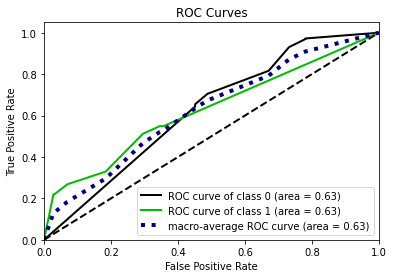

In [16]:
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), plot_micro = False)
plt.show()

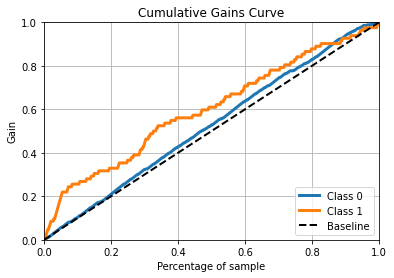

In [17]:
skplt.metrics.plot_cumulative_gain(y_test, model.predict_proba(X_test))
plt.show()

#### 8.Change parameter values ((1) criterion, (2) max_depth, and (3) min_samples_leaf) and find the better classification compared to the default option. (please use the “accuracy)” as a metric) 

In [18]:
model_1 = DecisionTreeClassifier(criterion='gini', max_depth= 3, min_samples_leaf=5, random_state = 42)
model_1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [19]:
y_pred_1 = model_1.predict(X_test)

In [20]:
conf_matrix_1 = pd.DataFrame(confusion_matrix(y_test, y_pred_1), index =['True[0]', 'True[1]'], 
                           columns = ['Predict[0]', 'Predict[1]'])
conf_matrix_1

,Predict[0],Predict[1]
True[0],359,0
True[1],71,11


In [22]:
print("The accuracy score is", accuracy_score(y_test, y_pred_1) * 100)

The accuracy score is 83.90022675736961


In [23]:
new_model_2 = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=3, random_state = 42)
new_model_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [24]:
y_pred_2 = new_model_2.predict(X_test)

In [25]:
conf_matrix_2 = pd.DataFrame(confusion_matrix(y_test, y_pred_2), index =['True[0]', 'True[1]'], 
                           columns = ['Predict[0]', 'Predict[1]'])
conf_matrix_2

,Predict[0],Predict[1]
True[0],335,24
True[1],59,23


In [26]:
print("The accuracy score is", accuracy_score(y_test, y_pred_2) * 100)

The accuracy score is 81.17913832199547


In [27]:
new_model_3 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=6, random_state = 42)
new_model_3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [28]:
y_pred_3 = new_model_3.predict(X_test)  

In [29]:
conf_matrix_3 = pd.DataFrame(confusion_matrix(y_test, y_pred_3), index =['True[0]', 'True[1]'], 
                           columns = ['Predict[0]', 'Predict[1]'])
conf_matrix_3

,Predict[0],Predict[1]
True[0],353,6
True[1],70,12


In [30]:
print("The accuracy score is", accuracy_score(y_test, y_pred_3) * 100)

The accuracy score is 82.76643990929705


In [32]:
new_model_4 = DecisionTreeClassifier(criterion='entropy', max_depth= 5,min_samples_leaf=5, random_state = 1)
new_model_4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [34]:
y_pred_4 = new_model_4.predict(X_test)

In [35]:
conf_matrix_4 = pd.DataFrame(confusion_matrix(y_test, y_pred_4), index =['True[0]', 'True[1]'], 
                           columns = ['Predict[0]', 'Predict[1]'])
conf_matrix_4

,Predict[0],Predict[1]
True[0],359,0
True[1],71,11


In [36]:
print("The accuracy score is", accuracy_score(y_test, y_pred_4) * 100)

The accuracy score is 83.90022675736961


In [37]:
new_model_5 = DecisionTreeClassifier(criterion='entropy', max_depth= 2, min_samples_leaf=2, random_state = 42)
new_model_5.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [38]:
y_pred_5 = new_model_5.predict(X_test)

In [39]:
conf_matrix_5 = pd.DataFrame(confusion_matrix(y_test, y_pred_5), index =['True[0]', 'True[1]'], 
                           columns = ['Predict[0]', 'Predict[1]'])
conf_matrix_5

,Predict[0],Predict[1]
True[0],359,0
True[1],71,11


In [40]:
print("The accuracy score is", accuracy_score(y_test, y_pred_5) * 100)

The accuracy score is 83.90022675736961


 **The maximum accuracy for decision tree classifier model is 83.9 % whereas the accuracy for decision tree base model with default parameters is 80.7 %** **

### 9.Use Random forest classifier and change parameters and find the best classification model (please use the “accuracy” as a metric)


In [41]:

forest = RandomForestClassifier(criterion='gini', max_depth= None, n_estimators = 100, random_state = None) # default values
forest.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
y_pred_forest = forest.predict(X_test)

In [43]:
conf_matrix_5 = pd.DataFrame(confusion_matrix(y_test, y_pred_forest), index =['True[0]', 'True[1]'], 
                           columns = ['Predict[0]', 'Predict[1]'])
conf_matrix_5

,Predict[0],Predict[1]
True[0],326,33
True[1],60,22


In [44]:
print("The accuracy score is", accuracy_score(y_test, y_pred_forest) * 100)

The accuracy score is 78.91156462585033


In [45]:
forest_1 = RandomForestClassifier(criterion='entropy', max_depth= 3, n_estimators = 500, random_state = 42)
forest_1.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [46]:
y_pred_forest_1 = forest_1.predict(X_test)

In [47]:
conf_matrix_7 = pd.DataFrame(confusion_matrix(y_test, y_pred_forest_1), index =['True[0]', 'True[1]'], 
                           columns = ['Predict[0]', 'Predict[1]'])
conf_matrix_7

,Predict[0],Predict[1]
True[0],359,0
True[1],72,10


In [48]:
print("The accuracy score is", accuracy_score(y_test, y_pred_forest_1) * 100)

The accuracy score is 83.6734693877551


In [49]:
forest_2 = RandomForestClassifier(criterion='gini', max_depth= 4, n_estimators = 700, random_state = 42)
forest_2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [50]:
y_pred_forest_2 = forest_2.predict(X_test)

In [51]:
conf_matrix_8 = pd.DataFrame(confusion_matrix(y_test, y_pred_forest_2), index =['True[0]', 'True[1]'], 
                           columns = ['Predict[0]', 'Predict[1]'])
conf_matrix_8

,Predict[0],Predict[1]
True[0],359,0
True[1],72,10


In [52]:
print("The accuracy score is", accuracy_score(y_test, y_pred_forest_2) * 100)

The accuracy score is 83.6734693877551


#### Using random forest base model(default parameters) to create ROC and cumulative gain graphs.

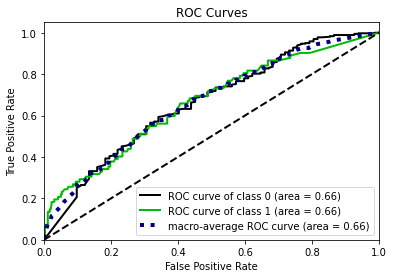

In [53]:
skplt.metrics.plot_roc(y_test, forest.predict_proba(X_test), plot_micro = False)    
plt.show()

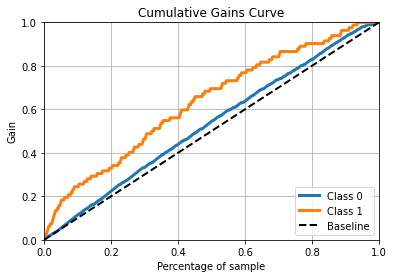

In [54]:
skplt.metrics.plot_cumulative_gain(y_test, forest.predict_proba(X_test))
plt.show()

**The maximum accuracy for random forest classifier model is 83.6 % whereas the accuracy for random forest base model(default parameters) is 78.9 %**